# Frequency analysis of the duplicated access requests.
In this notebook, we analize the duplicated access requests in the access log.
This property appear only in the synthetic access log. In the AMZ case study
we don't find this property.

In [2]:
### Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [4]:
### Load data
#filepath = "../data/no-uniform/UN-Pareto-AMZ-universal.csv"
#filepath = "../data/no-uniform/HC-expo-universal.csv"
#filepath = "../data/HC-universal.csv"
#filepath = "../data/HC-poisson-universal.csv"
filepath = "../../SecondYear/01-Datasets/IoT-amz-universal.csv"
acc_log = pd.read_csv(filepath)
acc_log = acc_log[acc_log.columns[1:]]
print("Access Log Loaded!")
print(acc_log.info())

Access Log Loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701883 entries, 0 to 5701882
Data columns (total 14 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   role         object
 1   age          int64 
 2   health       object
 3   uname        int64 
 4   type         object
 5   area         object
 6   mode         object
 7   temperature  int64 
 8   lockstatus   object
 9   rname        int64 
 10  location     object
 11  timeday      object
 12  op           object
 13  ACTION       int64 
dtypes: int64(5), object(9)
memory usage: 609.0+ MB
None


In [5]:
### Number of duplicated access requests
print("# Access requests = ", len(acc_log))
print("# Unique Access requests = ", len(acc_log.drop_duplicates()), 
      "({:.2f}%)".format((len(acc_log.drop_duplicates())*100)/len(acc_log)))
difference_acc_req = len(acc_log) - len(acc_log.drop_duplicates())
print("Difference = ", difference_acc_req)

# Access requests =  5701883
# Unique Access requests =  1321541 (23.18%)
Difference =  4380342


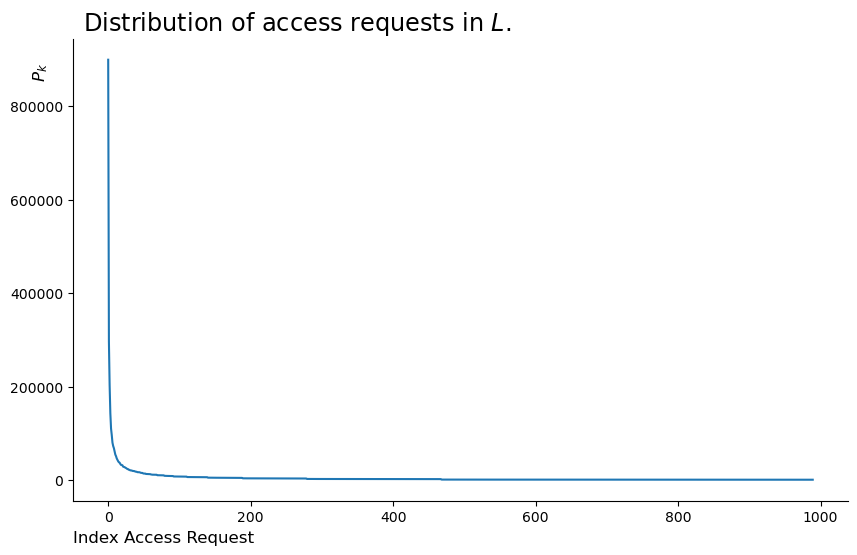

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
to_plot = acc_log.rname.value_counts()
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [15]:
to_plot = acc_log.value_counts(["uname", "rname"], normalize=False)
to_plot

uname  rname
122    989      72349
121    989      33630
120    989      29318
119    989      26621
118    989      24212
                ...  
33     518          1
27     38           1
37     383          1
63     125          1
30     467          1
Name: count, Length: 117539, dtype: int64

In [19]:
to_plot_dict = to_plot.reset_index().rename(columns={0: 'counts'}).to_dict(orient='records')
pd.DataFrame(to_plot_dict)

,uname,rname,count
0,122,989,72349
1,121,989,33630
2,120,989,29318
3,119,989,26621
4,118,989,24212
...,...,...,...
117534,33,518,1
117535,27,38,1
117536,37,383,1
117537,63,125,1


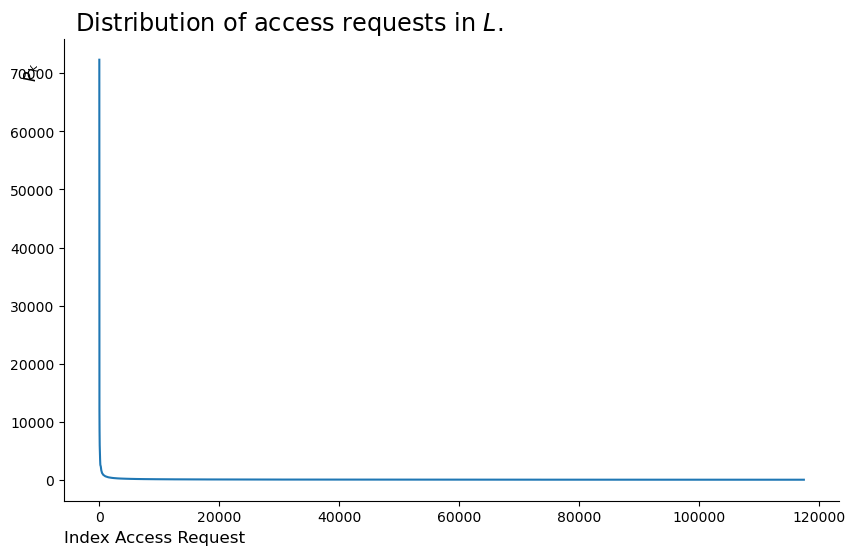

In [7]:
### Selection only user-resource access requests

#fpath = Path(mpl.get_data_path(), "C:\\Users\\danie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\mulish-regular.ttf")


fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
#to_plot = acc_log.value_counts(["uname", "rname", "op", "location", "timeday"], normalize=False)
to_plot = acc_log.value_counts(["uname", "rname"], normalize=False)
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [12]:
to_plot.keys()

MultiIndex([(122, 989),
            (121, 989),
            (120, 989),
            (119, 989),
            (118, 989),
            (122, 988),
            (117, 989),
            (116, 989),
            (114, 989),
            (115, 989),
            ...
            ( 19, 328),
            ( 47, 432),
            ( 20, 264),
            (  5, 288),
            (  5, 287),
            ( 33, 518),
            ( 27,  38),
            ( 37, 383),
            ( 63, 125),
            ( 30, 467)],
           names=['uname', 'rname'], length=117539)

In [8]:
new_plot = np.log2(to_plot.values) + 1
new_plot

array([17.14268546, 16.03746116, 15.83949907, ...,  1.        ,
        1.        ,  1.        ])

In [9]:
np.log2(1750) + 1

11.77313920671969

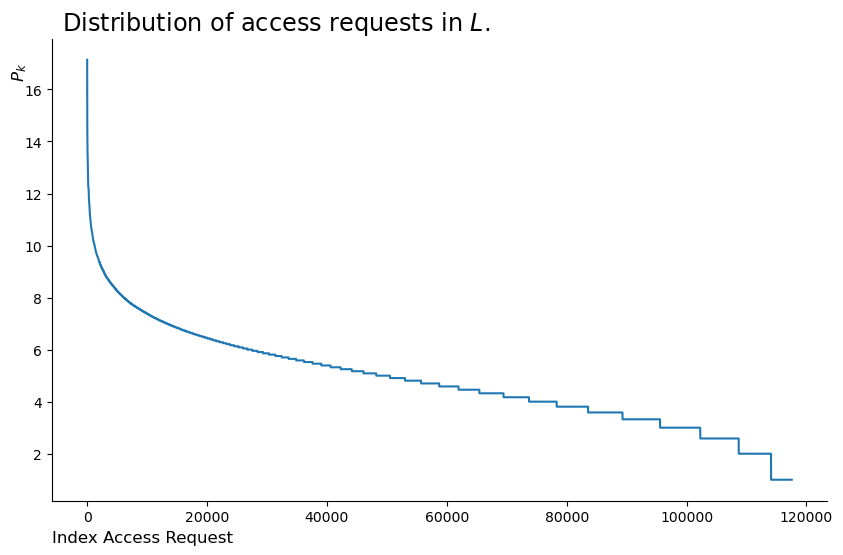

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(len(new_plot)), new_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [13]:
del acc_log, to_plot

In [5]:
# from collections import Counter
to_plot2 = Counter(list(to_plot.values))
to_plot2 = dict(to_plot2)
to_plot2

NameError: name 'Counter' is not defined

(array([123.,  28.,   5.,   6.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <BarContainer object of 10 artists>)

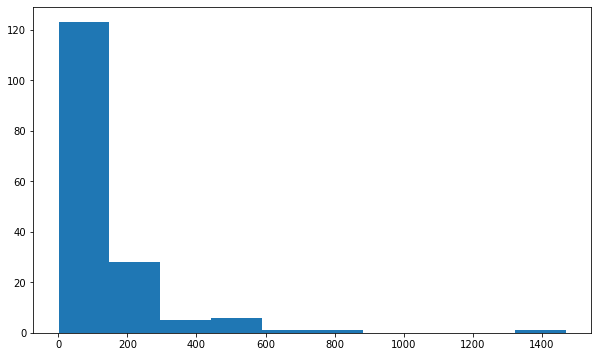

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(to_plot2)

([<matplotlib.patches.Wedge at 0x27b401b2148>,
 [Text(1.099999999391374, 3.659203734134094e-05, '11'),
  Text(1.0999999507012983, 0.0003293283186410189, '9'),
  Text(1.0999985977260371, 0.001756417021207093, '8'),
  Text(1.0999598011065734, 0.009404039003928716, '7'),
  Text(1.0993656042926456, 0.03735328765003709, '6'),
  Text(1.0921128842480075, 0.13148934580223082, '5'),
  Text(1.0247991974502633, 0.3997331671318963, '4'),
  Text(0.5828077596487207, 0.9329175286665158, '3'),
  Text(-0.7978362369704319, 0.7572696606737003, '2'),
  Text(0.08561190497115823, -1.0966633949062081, '1')],
 [Text(0.5999999996680221, 1.9959293095276873e-05, '0.0%'),
  Text(0.599999973109799, 0.00017963362834964665, '0.0%'),
  Text(0.5999992351232929, 0.0009580456479311416, '0.0%'),
  Text(0.5999780733308582, 0.005129475820324753, '0.2%'),
  Text(0.5996539659778066, 0.020374520536383865, '0.6%'),
  Text(0.5956979368625495, 0.07172146134667134, '2.1%'),
  Text(0.5589813804274163, 0.21803627298103434, '5.9%'),

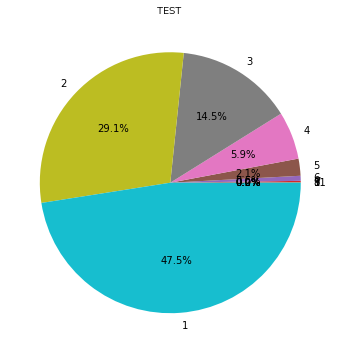

In [57]:
# AX-1
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("TEST ")
labels_ = list(to_plot2.keys())
data_ = list(to_plot2.values())
ax.pie(data_, labels=labels_, autopct='%1.1f%%')